# Maxpooling Layer

In this notebook, we add and visualize the output of a maxpooling layer in a CNN. 

A convolutional layer + activation function, followed by a pooling layer, and a linear layer (to create a desired output size) make up the basic layers of a CNN.

<img src='notebook_ims/CNN_all_layers.png' height=50% width=50% />

### Import the image

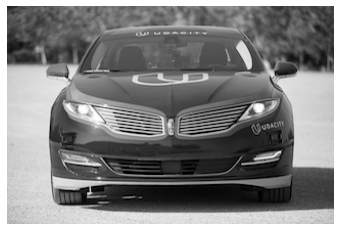

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'data/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
_ = plt.axis("off")

### Define and visualize the filters

In [2]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [3]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


### Define convolutional and pooling layers

You've seen how to define a convolutional layer, next is a:
* Pooling layer

In the next cell, we initialize a convolutional layer so that it contains all the created filters. Then add a maxpooling layer, [documented here](http://pytorch.org/docs/stable/_modules/torch/nn/modules/pooling.html), with a kernel size of (2x2) so you can see that the image resolution has been reduced after this step!

A maxpooling layer reduces the x-y size of an input and only keeps the most *active* pixel values. Below is an example of a 2x2 pooling kernel, with a stride of 2, applied to a small patch of grayscale pixel values; reducing the size of the patch by a factor of 4. Only the maximum pixel values in 2x2 remain in the new, pooled output.

<img src='notebook_ims/maxpooling_ex.png' height=50% width=50% />

In [4]:
import torch

# define a neural network with a convolutional layer with four filters
# AND a pooling layer of size (2, 2)
class Net(torch.nn.Module):

    # NOTE: we can add whatever parameters we want to the constructor. In this
    # case, we add as a parameter the array of the filters
    def __init__(self, filters):

        super(Net, self).__init__()

        # defines the convolutional layer
        k_height = filters.shape[-1]
        k_width = k_height

        self.conv_layer = torch.nn.Conv2d(
            1, 4, kernel_size=(k_height, k_width), stride=1, padding=0, bias=False
        )

        # activation
        self.activation = torch.nn.ReLU()
        
        # max pooling
        self.max_pool = torch.nn.MaxPool2d(2, 2)

        # The following part is not usually part of a pytorch model
        # (because the weights are learned). Here we initialize them
        # to the filters we manually defined just like we did before
        weights = torch.from_numpy(filters).unsqueeze(dim=1).type(torch.FloatTensor)
        self.conv_layer.weight = torch.nn.Parameter(weights)

    def forward(self, x):

        x = self.conv_layer(x)
        x = self.activation(x)        
        x = self.max_pool(x)

        return x


# instantiate the model and set the weights
model = Net(filters)

# print out the layer in the network
print(model)

Net(
  (conv_layer): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (activation): ReLU()
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### Visualize the output

In the following visualization we see the input image, the filters, then the feature maps after the convolution, then after the ReLU, and finally after the max pooling operation:

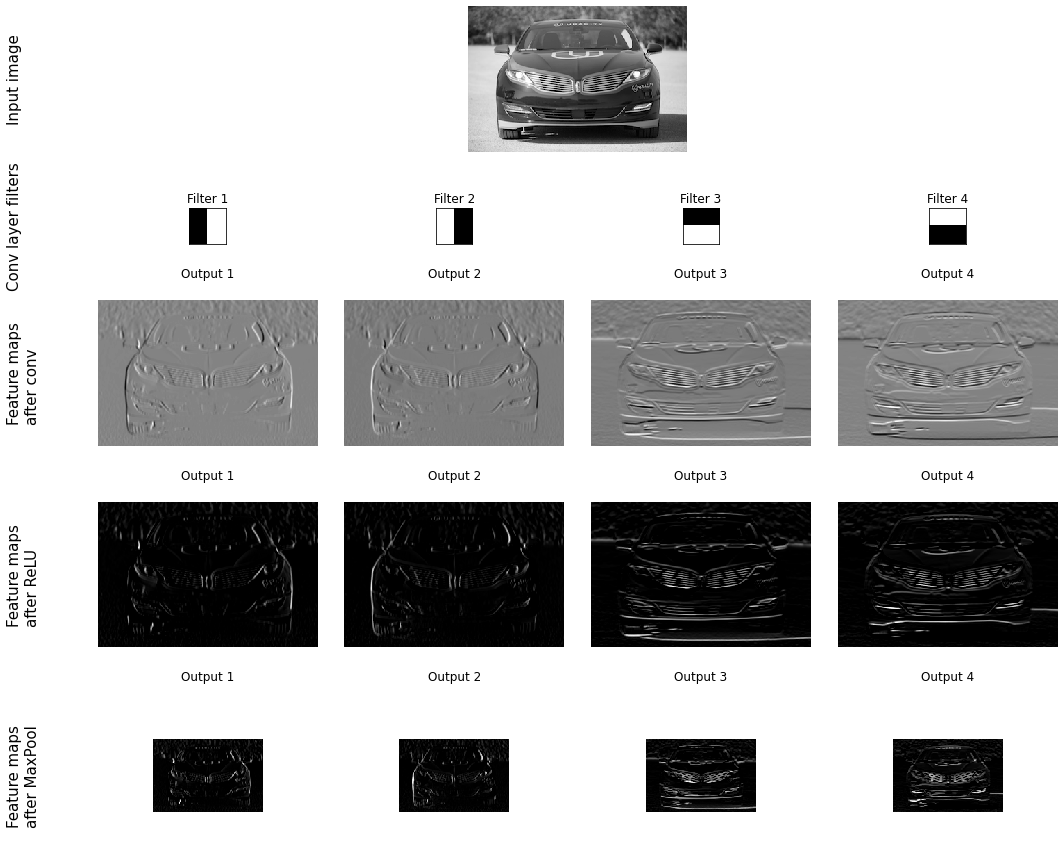

In [5]:
from helpers import show_feature_maps_full

show_feature_maps_full(gray_img, model, filters)

What do you see as the effects of Max Pooling? Describe these in the quiz below on this page.

Spend some time playing with the parameters of max pooling (kernel size, stride...) and with different activation functions (`tanh`, `sigmoid`...). Make note of the differences and describe them in the quiz below on this page.